# Data Preprocessing
We split the ground truth masks into 4 binary masks :
* `gt1` : Left Ventricule / Endocardium.
* `gt2` : Myocardium.
* `gt3` : Left Atrium.
* `gt4` : Epicardium (Union of Myocarium with Endocardium).

In [1]:
import SimpleITK as sitk
import os
import numpy as np

# Pixel spacing in mm as set by the original dataset
spacing = [0.308,0.154]
# Path to parent directory of dataset (Either test or train/val)
PATH="/home/mourad/TDSI/challenge/testmourad/"

for r,d,f in os.walk(PATH):
    for file in f:
        if ('ED_gt.mhd' in file) or ('ES_gt.mhd' in file):
            
            image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(r,file)))
            # We eliminate the first axis to get a 2D image
            image = image.squeeze()
            
            lv = np.where (image == 1, 1, 0)
            myo = np.where (image == 2,1 ,0)
            la = np.where (image == 3, 1 , 0)
            epi = myo + lv
            
            # Encoding in Char as the original format 
            lv = lv.astype('uint8')
            epi = epi.astype('uint8')
            la = la.astype('uint8')
            myo = myo.astype('uint8')
            
            lvImage = sitk.GetImageFromArray(lv,isVector=False)
            lvImage.SetSpacing(spacing)
            sitk.WriteImage(lvImage,os.path.join(r,file)[:-4]+"1.mhd",False)
            
            epiImage = sitk.GetImageFromArray(epi,isVector=False)
            epiImage.SetSpacing(spacing)
            sitk.WriteImage(epiImage,os.path.join(r,file)[:-4]+"4.mhd",False)
            
            laImage = sitk.GetImageFromArray(la,isVector=False)
            laImage.SetSpacing(spacing)
            sitk.WriteImage(laImage,os.path.join(r,file)[:-4]+"3.mhd",False)
            
            myoImage = sitk.GetImageFromArray(myo,isVector=False)
            myoImage.SetSpacing(spacing)
            sitk.WriteImage(myoImage,os.path.join(r,file)[:-4]+"2.mhd",False)

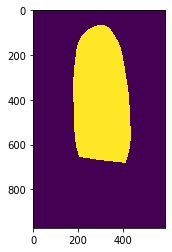

In [8]:
import SimpleITK as sitk
import os
import numpy as np

PATH="/home/mourad/TDSI/challenge/data/camus_separated"
for r,d,f in os.walk(PATH):
    for file in f:
        for i in range (3)
            if ('ED_gt' + str(i) + '.mhd' in file) or ('ES_gt' + str (i) + '.mhd' in file):        
                image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(r,file)))
                
                plt.imshow(image)